# Zomato 
understanding customer prefrences and restarunt trends is important for makig informed business descisions 
### Questions we ain to answer 
1. Do more restarunts provide onine delivery compared to offline services?
2. Which types of restaurants are favoured by the general public?
3. Which price range do couples prefer for dinind out

# Implementation 
### step 1: import necessary libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### step 2: create data frame 

In [2]:
dataframe = pd.read_csv("Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


### step 3: Data cleaning and preparation 
1. convert the rate column to a float by removing denominator characters

In [3]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)


dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


2. Getting summary of the dataframe using .info()

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


3. Checking for missing or null values to identify any data gaps

In [5]:
print(dataframe.isnull().sum())

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


### step 4: Exploring restaurant types
1. Listed_in(type) column to identify popular restaurants by categories


Text(0.5, 0, 'type of restaurant')

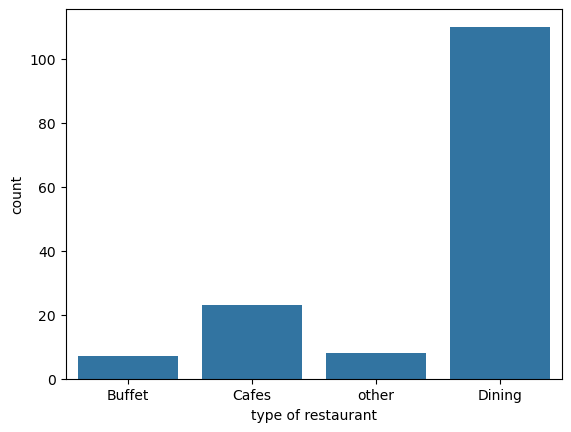

In [10]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")

2. Votes by restaurant type - Here we get the count of votes for each category

Text(0, 0.5, 'votes')

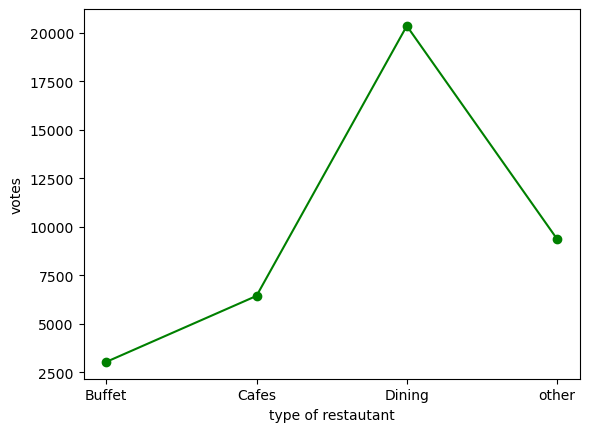

In [12]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c= 'green', marker='o')
plt.xlabel("type of restautant")
plt.ylabel("votes")

### step 5: identify the most voted restaurant

In [14]:
max_votes = dataframe["votes"].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


### step 6: Online order availability

<Axes: xlabel='online_order', ylabel='count'>

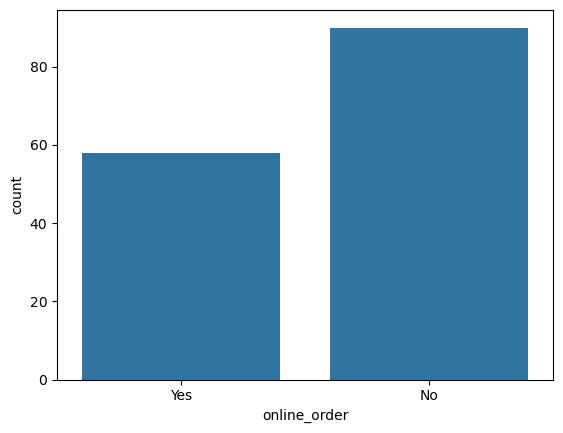

In [17]:
sns.countplot(x=dataframe['online_order'])

### step 7: Analyze ratings

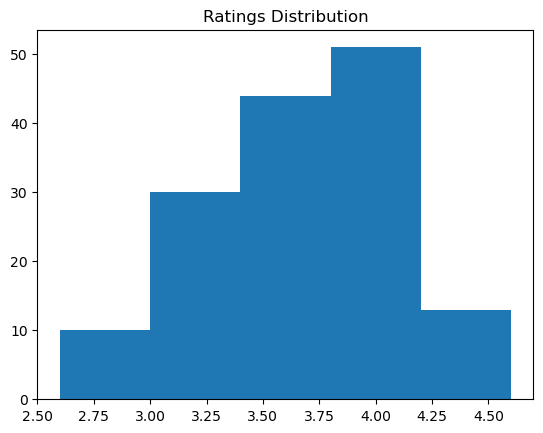

In [18]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

### step 8: Approximate cost for couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

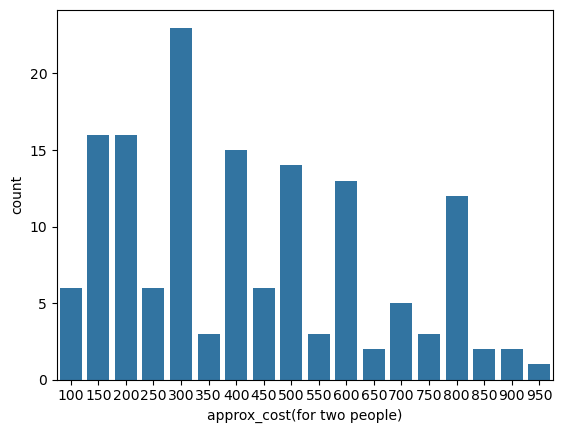

In [19]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

### step 9: Datings comparison - online vs offline orders

<Axes: xlabel='online_order', ylabel='rate'>

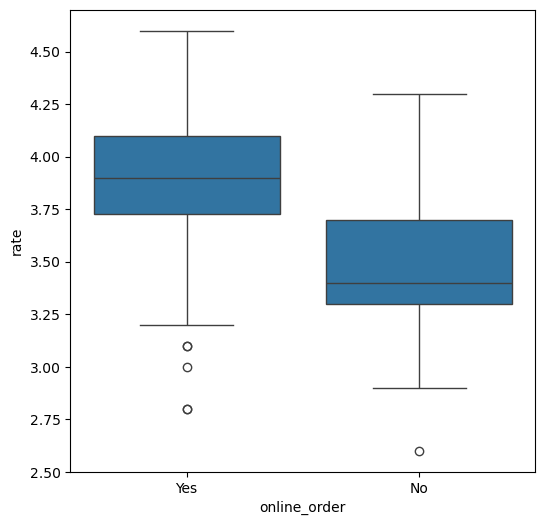

In [20]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

### Step 10: Order Mode Preferences by Restaurant Type
Find the relationship between order mode (online_order) and restaurant type (listed_in(type)).

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0): Creates a pivot table counting restaurants by type and online order availability.

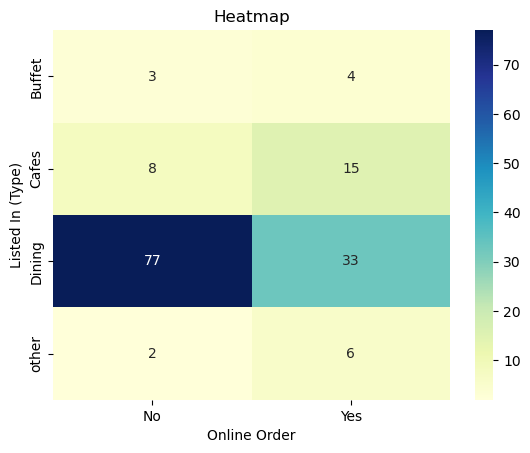

In [21]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()